# EDA

In [3]:
import pandas as pd

# Read the cleaned CSV file
df_apps = pd.read_csv(r"C:\Users\USER\OneDrive - Universidad Autonoma de Occidente\1. Ing. IAED\Semestre V\ETL\project_playstore_apps\data\Google-Playstore-Dataset-Clean.csv")

# Show the first rows of the DataFrame
print(df_apps.head())


                App Name      Category Installs  Size Minimum Android  \
0                Gakondo     Adventure      10+   10M      7.1 and up   
1    Ampere Battery Info         Tools   5,000+  2.9M      5.0 and up   
2                 Vibook  Productivity      50+  3.7M    4.0.3 and up   
3                 IMOCCI        Social      50+   46M      6.0 and up   
4  The Everyday Calendar     Lifestyle     500+   16M      5.0 and up   

       Released  Last Updated Content Rating  Rating  Minimum Installs  \
0  Feb 26, 2020  Feb 26, 2020       Everyone     0.0                10   
1  May 21, 2020  May 06, 2021       Everyone     4.4               100   
2   Aug 9, 2019  Aug 19, 2019       Everyone     0.0                50   
3  Dec 24, 2018  Dec 20, 2019           Teen     0.0                50   
4  Jun 21, 2019  Jun 21, 2019       Everyone     2.0               500   

   Maximum Installs  
0                15  
1              7662  
2                58  
3                89  
4     

In [4]:
# Get the number of rows and columns of the DataFrame
num_rows, num_columns = df_apps.shape

print("The DataFrame has {} and {} columns.".format(num_rows, num_columns))

The DataFrame has 1057521 and 11 columns.


In [5]:
print("Dataset information",df_apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057521 entries, 0 to 1057520
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1057518 non-null  object 
 1   Category          1057521 non-null  object 
 2   Installs          1057521 non-null  object 
 3   Size              1057521 non-null  object 
 4   Minimum Android   1057521 non-null  object 
 5   Released          1057521 non-null  object 
 6   Last Updated      1057521 non-null  object 
 7   Content Rating    1057521 non-null  object 
 8   Rating            1057521 non-null  float64
 9   Minimum Installs  1057521 non-null  int64  
 10  Maximum Installs  1057521 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 88.8+ MB
Dataset information None


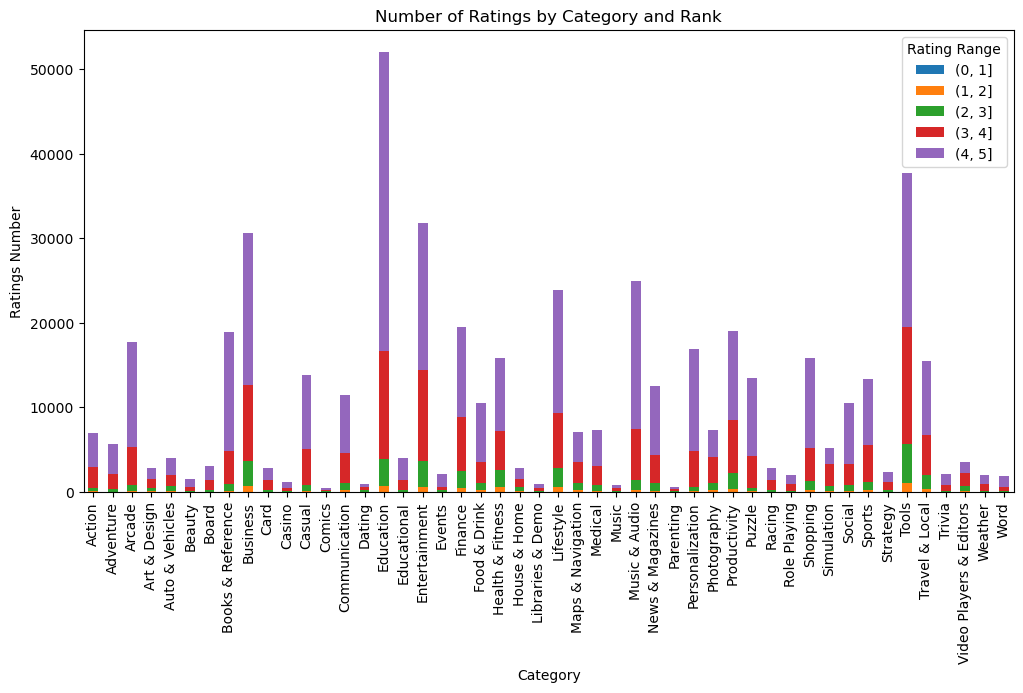

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Define ranges to group ratings
ranges = [0, 1, 2, 3, 4, 5]

# Create the range of each rating
rating_range = pd.cut(df_apps['Rating'], bins=ranges)

# Group data by category and rating range, and count the number of ratings in each group
counting_ratings_category = df_apps.groupby([df_apps['Category'], rating_range]).size().unstack(fill_value=0)

# Create the stacked bar chart
counting_ratings_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Ratings by Category and Rank')
plt.xlabel('Category')
plt.ylabel('Ratings Number')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Rating Range')
plt.show()

* The category with the highest number of qualifications is Education.
* The categories with fewer ratings are comics and parenting.
* The categories with the highest proportion of applications with a rating of 4 to 5 stars are Education, Business, Tools and Entertainment.

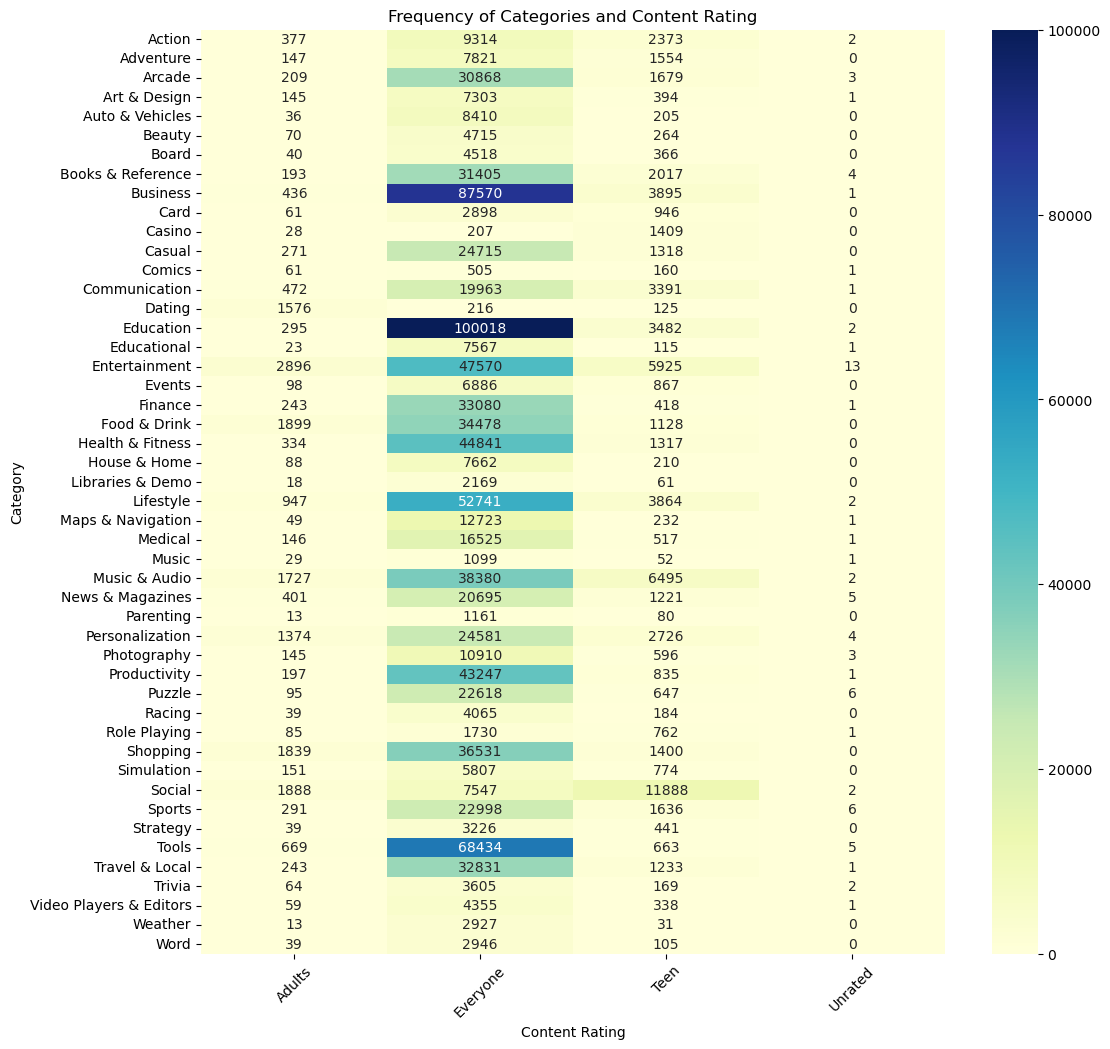

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the frequency table of category and content
frequency_table = df_apps.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)

# Create the heat map
plt.figure(figsize=(12, 12))
sns.heatmap(frequency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Categories and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

* Everyone has more apps in the categories of Education and Business.
* Teens have more apps in Social and Music and Audio.
* Adults have more apps in Entertainment.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove "+" and "," characters from installation numbers
df_modified = df_apps.assign(Installs=lambda x: x['Installs'].str.replace('+', '', regex=True).str.replace(',', '', regex=True))

# Convert facility values to numeric type
df_modified['Installs'] = pd.to_numeric(df_modified['Installs'], errors='coerce')

# Filter apps from category "Education"
df_educ = df_modified[df_modified['Category'] == 'Education']

# Sort applications by number of installations in descending order
educ_sorted = df_educ.sort_values(by='Installs', ascending=False)
top_educ = educ_sorted.head(8)

palette = sns.color_palette('deep', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_educ['App Name'], top_educ['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Education Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

error: nothing to repeat at position 0

In [10]:
# Filter apps from category "Social"
df_social = df_modified[df_modified['Category'] == 'Social']

# Sort applications by number of installations in descending order
social_sorted = df_social.sort_values(by='Installs', ascending=False)
top_social = social_sorted.head(8)

palette = sns.color_palette('husl', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_social['App Name'], top_social['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Social Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

NameError: name 'df_modified' is not defined

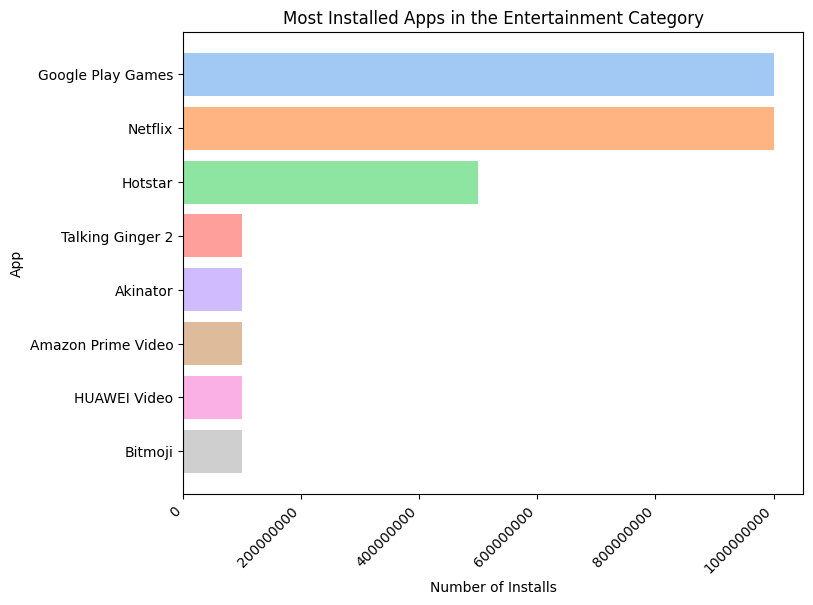

In [69]:
# Filter apps from category "Entertainment"
df_entt = df_modified[df_modified['Category'] == 'Entertainment']

# Sort applications by number of installations in descending order
entt_sorted = df_entt.sort_values(by='Installs', ascending=False)
top_entt = entt_sorted.head(8)

palette = sns.color_palette('pastel', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_entt['App Name'], top_entt['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Entertainment Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [70]:
# Here we find the count of rating for each possible mean rating
rating_most = df_apps.Rating.value_counts()

In [71]:
df_apps.Rating.value_counts()

0.0    549768
5.0     54356
4.2     34342
4.4     32470
4.3     31382
4.6     29861
4.5     28494
4.1     26430
4.8     26274
4.0     26198
4.7     23976
3.9     21738
4.9     21379
3.8     21298
3.7     17418
3.6     14717
3.5     13231
3.4     12368
3.3      9646
3.2      9466
3.0      7691
3.1      6911
2.8      5686
2.9      5250
2.6      4377
2.7      4341
2.5      3348
2.4      2994
2.3      2623
2.2      2457
2.0      1925
2.1      1848
1.8      1442
1.9      1373
1.7       987
1.6       812
1.5       607
1.4       520
1.0       342
1.2       296
1.3       296
1.1       142
Name: Rating, dtype: int64

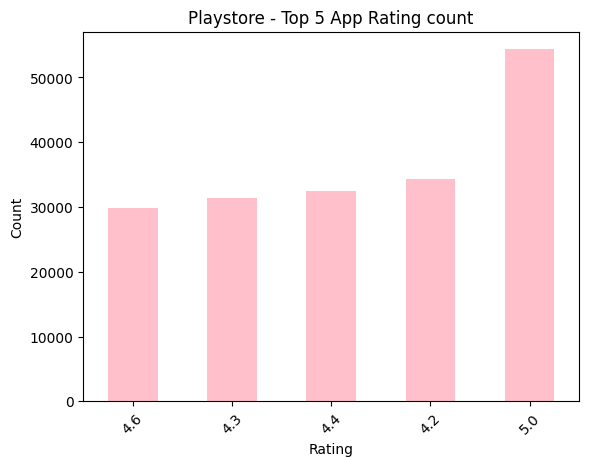

In [72]:
import matplotlib.pyplot as plt

#We look at the top five value counts  for rating
df_filtered = df_apps[df_apps["Rating"] != 0.0]
df_filtered["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar(color='pink')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)

plt.show()

In [73]:
#Here I try to sort app with rating 5 corresponding to installs
df5 = df_apps.sort_values(by=['Installs'], ascending=False)
df5

,App Name,Category,Installs,Size,Rating,Minimum Installs,Maximum Installs,Price,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
451995,Google Slides,Productivity,"500,000,000+",Varies with device,4.2,100.0,380.0,0.0,Varies with device,"Jun 25, 2014","Jun 15, 2021",Everyone,False,False,False
687323,Google Sheets,Productivity,"500,000,000+",Varies with device,4.0,100.0,380.0,0.0,Varies with device,"Apr 30, 2014","Jun 14, 2021",Everyone,False,False,False
645241,App Vault,Tools,"500,000,000+",23M,4.5,100.0,380.0,0.0,7.0 and up,"Sep 23, 2019","Jun 08, 2021",Everyone,True,False,False
949040,8 Ball Pool,Sports,"500,000,000+",67M,4.4,100.0,380.0,0.0,4.4 and up,"Jan 23, 2013","Jun 07, 2021",Everyone,True,True,True
856145,HiCare,Tools,"500,000,000+",26M,4.1,100.0,380.0,0.0,6.0 and up,"Nov 28, 2016","Mar 10, 2020",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238624,EnergyBuilder Data Capture,Business,0+,2.0M,0.0,0.0,0.0,0.0,5.0 and up,"Oct 17, 2019","Oct 17, 2019",Everyone,False,False,False
877464,Vaibhavmart Packer,Productivity,0+,4.4M,0.0,0.0,0.0,0.0,5.1 and up,"Feb 2, 2021","Feb 02, 2021",Everyone,False,False,False
122886,The Digital Classrooms,Education,0+,46M,0.0,0.0,0.0,0.0,5.0 and up,"May 25, 2021","May 25, 2021",Everyone,False,False,False
123003,calfhood,Education,0+,2.9M,0.0,0.0,0.0,0.0,7.0 and up,"Feb 24, 2021","Feb 25, 2021",Everyone,False,False,False


In [74]:
#Value count of each category for the apps with rating 10
df5.Category.value_counts(ascending=False)

Education                  104045
Business                    92258
Tools                       70131
Lifestyle                   57638
Entertainment               56565
Music & Audio               46676
Health & Fitness            46649
Productivity                44523
Shopping                    39829
Food & Drink                37600
Travel & Local              34401
Finance                     33900
Books & Reference           33662
Arcade                      32945
Personalization             28742
Casual                      26408
Sports                      25015
Communication               23932
Puzzle                      23465
News & Magazines            22359
Social                      21373
Medical                     17263
Maps & Navigation           13040
Action                      12152
Photography                 11681
Adventure                    9556
Auto & Vehicles              8699
House & Home                 7999
Art & Design                 7891
Events        

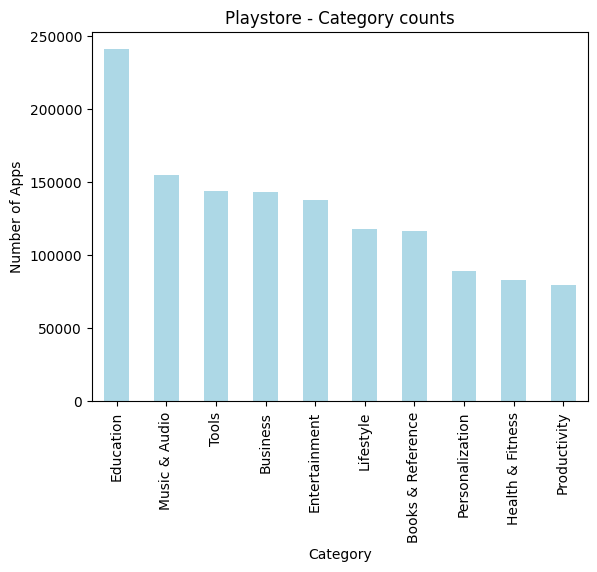

In [82]:
#Top ten categories with respect to value count of app (rating = 10)
df1.Category.value_counts(ascending=False).nlargest(10).sort_values(ascending=False).plot.bar(color='lightblue')
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts")
plt.show()